In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skgstat as skg
crw= pd.read_csv('crw.csv')

C:\Users\frobb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
crw

,RowID,SiteNum,Year,Date,County,District,Lon,Lat,NorthernCRW,WesternCRW,SouthernCRW,TotCRW
0,1,1.0,2019,2019-08-20,Grant,SW,-90.546480,42.587570,1.0,0,1.0,2.0
1,2,2.0,2019,2019-08-20,Grant,SW,-90.490890,42.696570,3.0,3,0.0,6.0
2,3,3.0,2019,2019-08-20,Grant,SW,-90.721350,42.716490,0.0,2,0.0,2.0
3,4,4.0,2019,2019-08-20,Grant,SW,-90.526210,42.844320,12.0,0,0.0,12.0
4,5,5.0,2019,2019-08-20,Grant,SW,-90.537350,42.974450,8.0,9,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4066,299.0,1997,1997-09-08,Shawano,NE,-88.376358,44.786934,15.0,0,0.0,15.0
4066,4067,300.0,1997,1997-09-08,Oconto,NE,-88.338830,44.875592,6.0,0,0.0,6.0
4067,4068,301.0,1997,1997-09-08,Marinette,NE,-87.891577,45.070349,0.0,0,0.0,0.0
4068,4069,302.0,1997,1997-09-08,Oconto,NE,-88.036879,44.886612,5.0,0,0.0,5.0


C:\Users\frobb\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


< gaussian Semivariogram fitted to 15 bins >

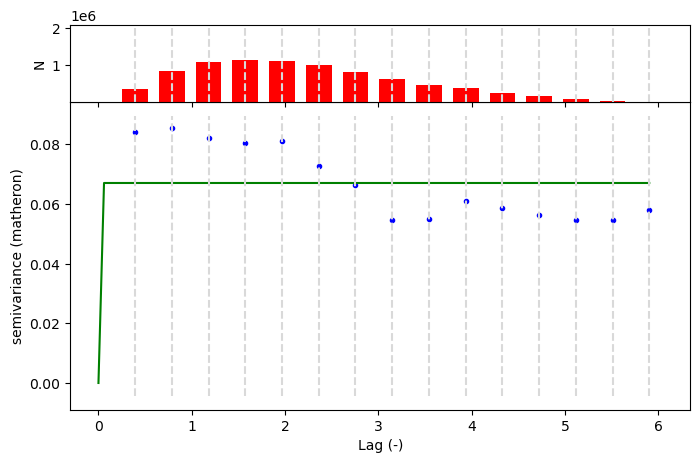

In [3]:
# the data functions return a dict of 'sample' and 'description'
#coordinates, values = skg.data.pancake(N=300).get('sample')
#coordinates = crw[['Lat', 'Lon']].copy()
coords= crw[['Lat', 'Lon']].to_numpy()

values = crw[['SouthernCRW']].to_numpy()
values= values.flatten()


V = skg.Variogram(coordinates=coords, values=values)
#print(V)
V.model = 'gaussian'
V.n_lags = 15
V.maxlag = 100

# plot - matplotlib and plotly are available backends
fig = V.plot()
V

C:\Users\frobb\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


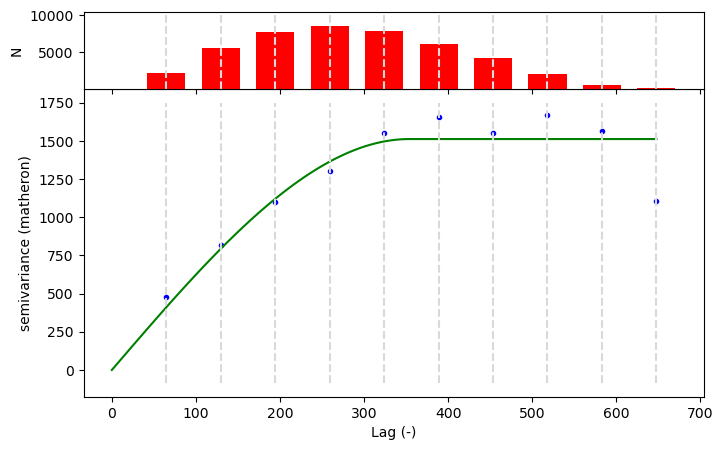

In [4]:
coordinates, values = skg.data.pancake(N=300).get('sample')

V = skg.Variogram(coordinates=coordinates, values=values)
#print(V)
fig = V.plot()


In [8]:
#coordinates['Lon']= coordinates['Lon'].astype(str)
#coordinates['Lat']= coordinates['Lat'].astype(str)


coordinates['coords'] = coordinates[['Lat', 'Lon']].agg(','.join, axis=1)

TypeError: sequence item 0: expected str instance, float found

In [9]:
coordinates

,Lat,Lon
0,42.587570,-90.546480
1,42.696570,-90.490890
2,42.716490,-90.721350
3,42.844320,-90.526210
4,42.974450,-90.537350
...,...,...
4065,44.786934,-88.376358
4066,44.875592,-88.338830
4067,45.070349,-87.891577
4068,44.886612,-88.036879
